### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading the data

In [ ]:
data = pd.read_csv('/content/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Preprocessing

Cheaking null values

In [ ]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Make yes = 1 , and no = 0 to see the correlation in the heat map

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Extracurricular Activities"]= le.fit_transform(data["Extracurricular Activities"])

<Axes: >

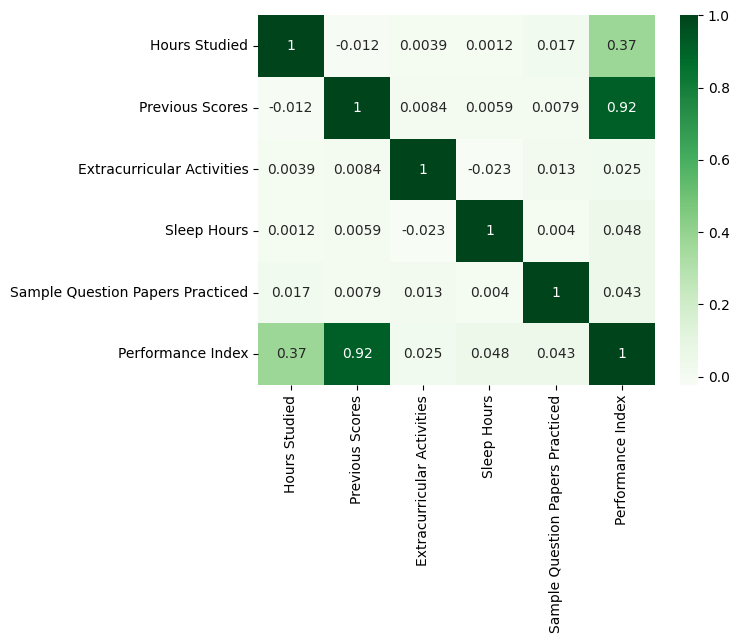

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Greens')

Remove the columns with closest correlation to 0

In [ ]:
data = data.drop(['Sample Question Papers Practiced','Extracurricular Activities'], axis=1)
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Performance Index
0,7,99,9,91.0
1,4,82,4,65.0
2,8,51,7,45.0
3,5,52,5,36.0
4,7,75,8,66.0


### Split the data to Features (x) and goal (y)

In [ ]:
x = data.drop("Performance Index",axis=1)
y = data["Performance Index"]

In [ ]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours
0,7,99,9
1,4,82,4
2,8,51,7
3,5,52,5
4,7,75,8


In [ ]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


### Split x and y to train and test

70% for training and 30% for testing  

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 3)
(7000,)
(3000, 3)
(3000,)


### Training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Testing

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R2 Score:", R2)

Mean Absolute Error: 1.7008844445616418
Mean Squared Error: 4.53710947019777
Root Mean Squared Error: 2.1300491708403753
R2 Score: 0.9877395209536659


###Using the model

Taking inputs

In [ ]:
hours_studied = float(input("Enter hours studied: "))
previous_scores = float(input("Enter previous score: "))
sleep_hours = float(input("Enter sleep hours: "))

Enter hours studied: 10
Enter previous score: 90
Enter sleep hours: 6


Make a table for the inputs

In [ ]:
user_input = pd.DataFrame({'Hours Studied': [hours_studied], 'Previous Scores': [previous_scores], 'Sleep Hours': [sleep_hours]})
user_input

,Hours Studied,Previous Scores,Sleep Hours
0,10.0,90.0,6.0


Predict the performance

In [ ]:
prediction = model.predict(user_input)
if prediction[0] > 100:
  prediction[0] = 100
elif prediction[0] < 0:
  prediction[0] = 0
print("Prediction Performance:", prediction[0])

Prediction Performance: 90.21613463598436


###The Equation


b =

In [ ]:
model.intercept_

-32.69505979224301

W1, W2, W3 =

In [ ]:
model.coef_

array([2.86145642, 1.01597376, 0.47649858])



> y = X1W1 + X2W2 + X3W3 + b



`y = Hours Studied * 2.86145642 +	Previous Scores * 1.01597376 +	Sleep Hours * 0.47649858 + (-32.69505979224301)`
